In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium as fo
from haversine import haversine

# A번 1) Home position과 기체와의 거리를 0.1초 간격으로 산출하시오.

In [2]:
df = pd.read_csv('DJIFlightRecord_2018-04-19.csv')

In [3]:
df.head()

Id  Time(seconds) Time(text)   Latitude   Longitude FlightMode  \
0   1            0.7    0m 0.7s  36.500569  126.337392      P-GPS   
1   2            0.8    0m 0.8s  36.500569  126.337392      P-GPS   
2   3            0.9    0m 0.9s  36.500569  126.337392      P-GPS   
3   4            1.0      0m 1s  36.500569  126.337392      P-GPS   
4   5            1.1    0m 1.1s  36.500569  126.337392      P-GPS   

  Altitude(feet)  Altitude(meters)  HSpeed(mph)  HSpeed(m/s)  ...  RcAileron  \
0            0.0               0.0          0.0          0.0  ...       1024   
1            0.0               0.0          0.0          0.0  ...       1024   
2            0.0               0.0          0.0          0.0  ...       1024   
3            0.0               0.0          0.0          0.0  ...       1024   
4            0.0               0.0          0.0          0.0  ...       1024   

   RcElevator RcGyro  RcRudder  RcThrottle  NonGpsError  GoHomeStatus  AppTip  \
0        1024   1024      1024        1024          NaN           NaN     NaN   
1        1024   1024      1024        1024          NaN           NaN     NaN   
2        1024   1024      1024        1024          NaN           NaN     NaN   
3        1024   1024      1024        1024          NaN           NaN     NaN   
4        1024   1024      1024        1024          NaN           NaN     NaN   

   AppWarning  AppMessage  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

[5 rows x 42 columns]

In [4]:
location = df[['Latitude', 'Longitude']] # 기체의 위치

In [5]:
location.head()

Latitude   Longitude
0  36.500569  126.337392
1  36.500569  126.337392
2  36.500569  126.337392
3  36.500569  126.337392
4  36.500569  126.337392

In [6]:
home = df[['HomeLatitude', 'HomeLongitude']] # Home Position

In [7]:
home.head()

HomeLatitude  HomeLongitude
0     36.500569     126.337392
1     36.500569     126.337392
2     36.500569     126.337392
3     36.500569     126.337392
4     36.500569     126.337392

In [8]:
df.shape[0]

5426

In [9]:
dist = []

for i in range(df.shape[0]): # 반복문을 사용해 dist의 리스트 안에 거리 자료 담기
    dji = (location.loc[i][0], location.loc[i][1]) # 기체의 위치
    home_position = (home.loc[i][0], home.loc[i][1]) # Home position
    dist.append(haversine(dji, home_position, unit = 'm')) # 미터 단위 사용 (하버사인 사용)
df['Distance'] = dist

In [10]:
df['Distance'] # 5426개 길이의 리스트

0       0.042598
1       0.052008
2       0.051036
3       0.065152
4       0.065152
          ...   
5421    6.169011
5422    6.178301
5423    6.173617
5424    6.170729
5425    6.171598
Name: Distance, Length: 5426, dtype: float64

In [11]:
df2 = df[['Time(seconds)', 'Distance']] # 시간별 기체와 Homposition 거리 데이터 프레임
df2 = df2.set_index("Time(seconds)") # 인덱스를 시간(초)로 변경
df2

Distance
Time(seconds)          
0.7            0.042598
0.8            0.052008
0.9            0.051036
1.0            0.065152
1.1            0.065152
...                 ...
600.5          6.169011
600.6          6.178301
600.7          6.173617
600.8          6.170729
600.9          6.171598

[5426 rows x 1 columns]

# A번 2)  Home position과 비행체의 거리의 평균과 표준편차를 산출하시오.

In [12]:
print("조종사(Home position)와 비행체의 거리의 평균:", np.average(dist)) # A번 1)의 home position과 기체의 거리인 dist 리스트 사용
print("조종사(Home position)와 비행체의 거리의 표준편차:", np.std(dist))

조종사(Home position)와 비행체의 거리의 평균: 286.66953601449455
조종사(Home position)와 비행체의 거리의 표준편차: 193.4271016944724


# A번 3) 비행체의 비행 좌표를 그림으로 그리시오.

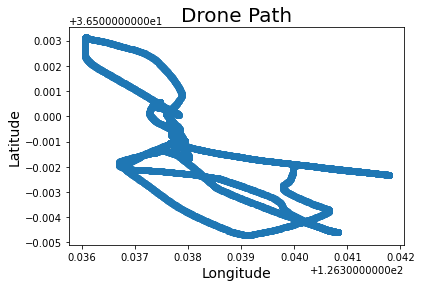

In [13]:
plt.scatter(df["Longitude"], df["Latitude"])
plt.xlabel("Longitude", size=14)
plt.ylabel("Latitude", size=14)
plt.title("Drone Path", size = 20)
plt.show()

In [14]:
map = fo.Map(
    location = [df['Latitude'].mean(), df['Longitude'].mean()], # 전체 비행의 중심
    zoom_start= 16) # 적절한 줌 값 사용
for i in df.index[:df.shape[0] - 1]: 
    lat = df.loc[i, 'Latitude'] # 비행한 위도
    long = df.loc[i, 'Longitude'] # 비행한 경도
    fo.Circle( # folium의 도구 Circle(점)을 사용하여 비행 위치 확인
        [lat,long],
        color = 'Orange', # 색깔 주황색 사용
        radius = 0.5 # 점의 지름 0.5
).add_to(map)
    
map

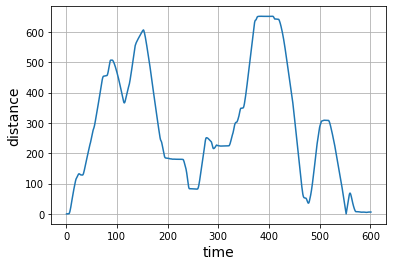

In [15]:
x = np.array(df["Time(seconds)"])
y = np.array(dist)

plt.plot(x, y)
plt.xlabel("time", size = 14)
plt.ylabel("distance", size = 14)
plt.grid()
plt.show()

# B번 1) 회전익의 전장, 전폭, 전고, 무게에 대한 통계기본 값들을 구하시오.

In [16]:
RotaryWing_df = pd.read_csv('MultiCopter.csv')

In [17]:
RotaryWing_df.head()

Company           Name  Length  Width  Height  Weight
0     DJI   MAVIC 2 ZOOM   322.0  242.0    84.0     905
1     DJI    MAVIC 2 PRO   322.0  242.0    84.0     907
2     DJI  PHANTOM 4 PRO   289.5  289.5   196.0    1375
3     DJI          SPARK   143.0  143.0    55.0     300
4     DJI      INSPIRE 2   427.0  317.0   425.0    3440

#### 데이터의 성격을 파악해 본다

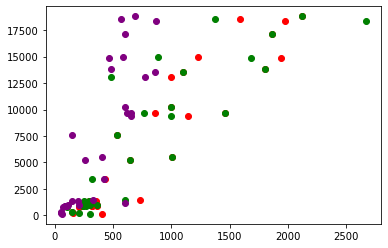

In [18]:
x_RW_length = np.array(RotaryWing_df["Length"])
x_RW_width = np.array(RotaryWing_df["Width"])
x_RW_height = np.array(RotaryWing_df["Height"])
y_RW_weight = np.array(RotaryWing_df["Weight"])
plt.scatter(x_RW_length, y_RW_weight, color="red")
plt.scatter(x_RW_width, y_RW_weight, color ='green')
plt.scatter(x_RW_height, y_RW_weight, color ='purple')
plt.show()

In [19]:
print(RotaryWing_df.describe()) # 회전익의 행의 수, 전장, 전폭, 전고, 무게에 대한 평균, 표준편차, 최솟값, 최댓값 등
print()
print("회전익 전장의 분산:", np.var(RotaryWing_df['Length']))
print("회전익 전폭의 분산:", np.var(RotaryWing_df['Width']))
print("회전익 전고의 분산:", np.var(RotaryWing_df['Height']))
print("회전익 무게의 분산:", np.var(RotaryWing_df['Weight']))

            Length        Width      Height        Weight
count    30.000000    30.000000   30.000000     30.000000
mean    865.283333   809.703333  391.120000   7176.800000
std     625.871912   675.807190  267.446684   6670.084285
min     143.000000   106.000000   55.000000    147.000000
25%     335.000000   292.125000  120.000000    956.750000
50%     686.500000   567.500000  414.500000   5375.000000
75%    1203.750000  1075.500000  600.000000  13400.000000
max    2123.000000  2665.000000  868.000000  18800.000000

회전익 전장의 분산: 378658.4613888888
회전익 전폭의 분산: 441491.5123222222
회전익 전고의 분산: 69143.47093333333
회전익 무게의 분산: 43007023.56000001


### Another Solution

In [20]:
import numpy as np
import pandas as pd

def my_func(list):
    average = np.average(list)
    standard_deviation = np.std(list)
    variance = np.var(list)
    print("평균 : ", average, " / 분산 : ", variance, " / 표준편차 : ", standard_deviation)
    
df2 = pd.read_csv('MultiCopter.csv')
multicopter_weight = df2['Weight']
multicopter_length = df2['Length']
multicopter_width = df2['Width']
multicopter_height = df2['Height']

print("<무게>")
my_func(multicopter_weight)
print("<전장>")
my_func(multicopter_length)
print("<전폭>")
my_func(multicopter_width)
print("<전고>")
my_func(multicopter_height)

<무게>
평균 :  7176.8  / 분산 :  43007023.56000001  / 표준편차 :  6557.974043864462
<전장>
평균 :  865.2833333333333  / 분산 :  378658.4613888888  / 표준편차 :  615.3523067226521
<전폭>
평균 :  809.7033333333333  / 분산 :  441491.5123222222  / 표준편차 :  664.448276634248
<전고>
평균 :  391.12  / 분산 :  69143.47093333333  / 표준편차 :  262.95146117360395


# B번 2) 고정익의 전장, 전폭, 무게에 대한 통계기본 값

In [21]:
FixedWing_df = pd.read_csv('FixedWing.csv')

In [22]:
FixedWing_df.head() # 고정익 자료에는 전고가 없다

Company         Name  Length  Width  Weight
0                    XK    A100 SU27     420    340      65
1                 Samco     DUODRONE    1400   2200    3200
2            Uconsystem    RemoM-002    1440   1800    3500
3  Suewon Unmanned Tech      SCANNER    1200   2600    5000
4            KEVA Drone  KD-2 MAPPER    1100   1800    2000

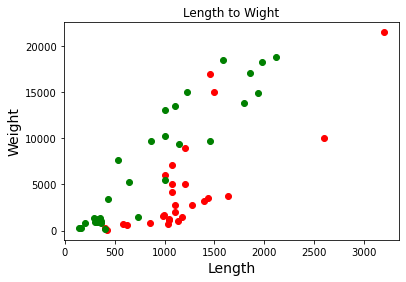

In [23]:
x_FW_length = np.array(FixedWing_df["Length"])
x_RW_length = np.array(RotaryWing_df["Length"])
y_FW_weight = np.array(FixedWing_df["Weight"])
y_RW_weight = np.array(RotaryWing_df["Weight"])

plt.title("Length to Wight")
plt.xlabel("Length", size = 14)
plt.ylabel("Weight", size = 14)
plt.scatter(x_FW_length, y_FW_weight, color="red")
plt.scatter(x_RW_length, y_RW_weight, color ='green')
plt.show()

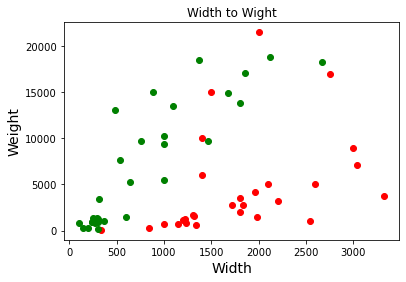

In [24]:
x_FW_width = np.array(FixedWing_df["Width"])
x_RW_width = np.array(RotaryWing_df["Width"])
y_FW_weight = np.array(FixedWing_df["Weight"])
y_RW_weight = np.array(RotaryWing_df["Weight"])

plt.title("Width to Wight")
plt.xlabel("Width", size = 14)
plt.ylabel("Weight", size = 14)
plt.scatter(x_FW_width, y_FW_weight, color="red")
plt.scatter(x_RW_width, y_RW_weight, color ='green')
plt.show()

In [25]:
print(FixedWing_df.describe()) # 고정익의 행의 수, 전장, 전폭, 무게에 대한 평균, 표준편차, 최솟값, 최댓값 등
print()
print("고정익 전장의 분산:", np.var(FixedWing_df['Length']))
print("고정익 전폭의 분산:", np.var(FixedWing_df['Width']))
print("고정익 무게의 분산:", np.var(FixedWing_df['Weight']))

            Length        Width        Weight
count    28.000000    28.000000     28.000000
mean   1199.785714  1782.000000   4616.964286
std     570.110994   718.092793   5388.869417
min     405.000000   340.000000     65.000000
25%     997.500000  1292.000000   1087.500000
50%    1087.500000  1759.000000   2750.000000
75%    1302.500000  2125.000000   5250.000000
max    3200.000000  3320.000000  21500.000000

고정익 전장의 분산: 313418.45408163266
고정익 전폭의 분산: 497240.9285714286
고정익 무게의 분산: 28002773.82015306


### Another Solution

In [26]:
import numpy as np
import pandas as pd

def my_func(list):
    average = np.average(list)
    standard_deviation = np.std(list)
    variance = np.var(list)
    print("평균 : ", average, " / 분산 : ", variance, " / 표준편차 : ", standard_deviation)
    
df3 = pd.read_csv('FixedWing.csv')
fixedwing_weight = df3['Weight']
fixedwing_length = df3['Length']
fixedwing_width = df3['Width']

print("<무게>")
my_func(fixedwing_weight)
print("<전장>")
my_func(fixedwing_length)
print("<전폭>")
my_func(fixedwing_width)

<무게>
평균 :  4616.964285714285  / 분산 :  28002773.82015306  / 표준편차 :  5291.764717006328
<전장>
평균 :  1199.7857142857142  / 분산 :  313418.45408163266  / 표준편차 :  559.8378819637277
<전폭>
평균 :  1782.0  / 분산 :  497240.9285714286  / 표준편차 :  705.1531242017074


In [27]:
FixedWing_df.head()

Company         Name  Length  Width  Weight
0                    XK    A100 SU27     420    340      65
1                 Samco     DUODRONE    1400   2200    3200
2            Uconsystem    RemoM-002    1440   1800    3500
3  Suewon Unmanned Tech      SCANNER    1200   2600    5000
4            KEVA Drone  KD-2 MAPPER    1100   1800    2000

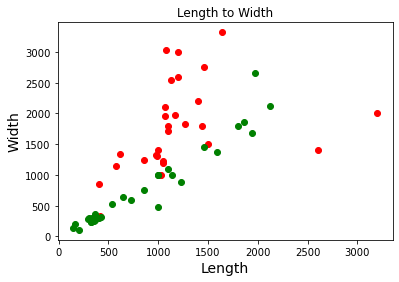

In [28]:
x_FW_length = np.array(FixedWing_df["Length"])
x_RW_length = np.array(RotaryWing_df["Length"])
y_FW_width = np.array(FixedWing_df["Width"])
y_RW_width = np.array(RotaryWing_df["Width"])

plt.title("Length to Width")
plt.xlabel("Length", size = 14)
plt.ylabel("Width", size = 14)

plt.scatter(x_FW_length, y_FW_width, color="red")
plt.scatter(x_RW_length, y_RW_width, color ='green')
plt.show()

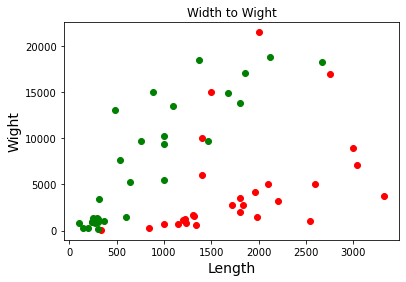

In [29]:
x_FW_width = np.array(FixedWing_df["Width"])
x_RW_width = np.array(RotaryWing_df["Width"])
y_FW_weight = np.array(FixedWing_df["Weight"])
y_RW_weight = np.array(RotaryWing_df["Weight"])

plt.title("Width to Wight")
plt.xlabel("Length", size = 14)
plt.ylabel("Wight", size = 14)
plt.scatter(x_FW_width, y_FW_weight, color="red")
plt.scatter(x_RW_width, y_RW_weight, color ='green')
plt.show()

In [30]:
x_FW_length = np.array(FixedWing_df["Length"])
x_RW_length = np.array(RotaryWing_df["Length"])
y_FW_width = np.array(FixedWing_df["Width"])
y_RW_width = np.array(RotaryWing_df["Width"])
z_FW_weight = np.array(FixedWing_df["Weight"])
z_RW_weight = np.array(RotaryWing_df["Weight"])

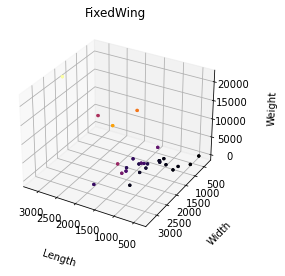

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for data in FixedWing_df:
    ax.set_xlabel("Length", labelpad=16)
    ax.set_ylabel("Width",  labelpad=16)
    ax.set_zlabel("Weight", labelpad=16)
    ax.set_title("FixedWing")
    ax.view_init(elev=30., azim=120)    # 각도 지정    
    ax.scatter(x_FW_length,y_FW_width,z_FW_weight,  # 3D scatter plot
               c=z_FW_weight, cmap="inferno", s=5, alpha=0.5)

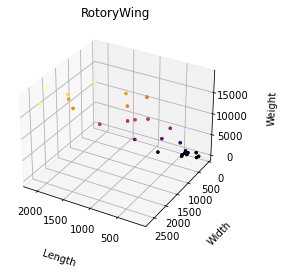

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for data in RotaryWing_df:
    ax.set_xlabel("Length", labelpad=16)
    ax.set_ylabel("Width",  labelpad=16)
    ax.set_zlabel("Weight", labelpad=16)
    ax.set_title("RotoryWing")
    ax.view_init(elev=30., azim=120)    # 각도 지정    
    ax.scatter(x_RW_length, y_RW_width, z_RW_weight,  # 3D scatter plot
               c=z_RW_weight, cmap="inferno", s=5, alpha=0.5)

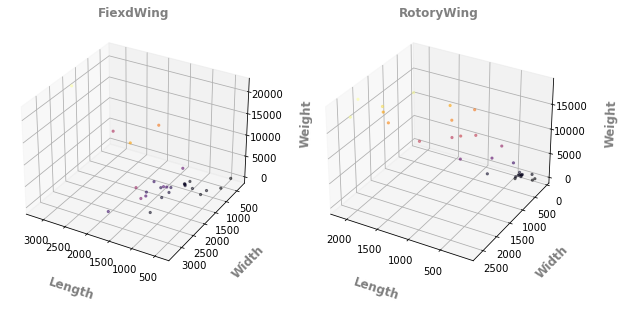

In [33]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}
for ax, data in zip(axs, [FixedWing_df, RotaryWing_df]):
    ax.set_xlabel("Length", fontdict=fontlabel, labelpad=16)
    ax.set_ylabel("Width", fontdict=fontlabel, labelpad=16)
    ax.set_zlabel("Weight", fontdict=fontlabel, labelpad=16)
    SubTitle = "FiexdWing" if ax == axs[0] else "RotoryWing"
    ax.set_title(SubTitle, fontdict=fontlabel)
    ax.view_init(elev=30., azim=120)    # 각도 지정
    
    ax.scatter(data["Length"], data["Width"], data["Weight"],  # 3D scatter plot
               c=data["Weight"], cmap="inferno", s=5, alpha=0.5)

# B번 3) 회전익의 전장, 전폭, 무게에 대한 공분산을 구하시오.

# B번 3) -1 회전익의 전장과 전폭에 대한 공분산

cov_xy 393411.0090555555


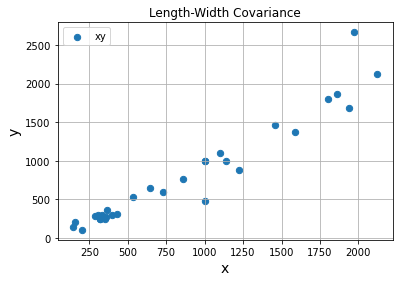

In [34]:
x = RotaryWing_df['Length']
y = RotaryWing_df['Width']

cov_xy = np.average((x-np.average(x))*(y-np.average(y)))
print("cov_xy", cov_xy)

plt.scatter(x, y, marker='o', label="xy", s=40)
plt.legend()

plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()
plt.title("Length-Width Covariance")

plt.show()

# B번 3) -2 회전익의 전장과 전고에 대한 공분산

cov_xy 121808.096


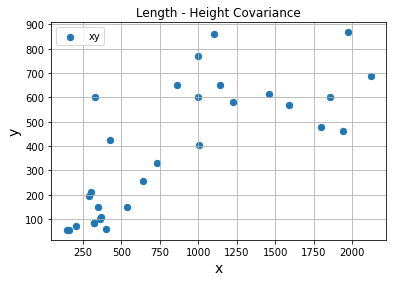

In [35]:
x = RotaryWing_df['Length']
y = RotaryWing_df['Height']

cov_xy = np.average((x-np.average(x))*(y-np.average(y)))
print("cov_xy", cov_xy)

plt.scatter(x, y, marker='o', label="xy", s=40)
plt.legend()

plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()
plt.title("Length - Height Covariance")

plt.show()

# B번 3) -3 회전익의 전폭과 전고에 대한 공분산

cov_xy 125024.85226666667


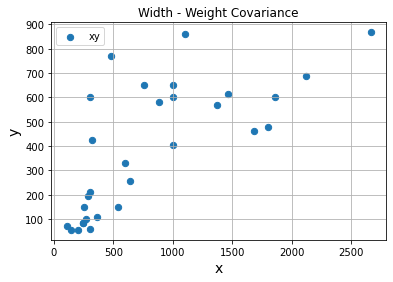

In [36]:
x = RotaryWing_df['Width']
y = RotaryWing_df['Height']

cov_xy = np.average((x-np.average(x))*(y-np.average(y)))
print("cov_xy", cov_xy)

plt.scatter(x, y, marker='o', label="xy", s=40)
plt.legend()

plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.grid()
plt.title("Width - Weight Covariance")

plt.show()